In [1]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from google.colab import files
from tensorflow.keras import applications

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
import time
import os

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from keras.applications.mobilenet import MobileNet
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [5]:
cd '/content/drive/MyDrive/CVProject/'

/content/drive/MyDrive/CVProject


In [8]:
! ls

CVProject.ipynb  Dataset  Landmark_Detection_MER.pdf


In [9]:
train_data = '/content/drive/MyDrive/CVProject/Dataset'

In [10]:
image_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.2, 1),
    shear_range=45,
    zoom_range=(0.5, 1.5),
    fill_mode='reflect',
    horizontal_flip=True,
    preprocessing_function=preprocess_input,
    validation_split=0.2
    )

In [11]:
train_gen = image_gen.flow_from_directory(
    train_data,
    target_size=(224,224),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=32,
    seed=0,
    subset='training'
    )

Found 309 images belonging to 18 classes.


In [12]:
val_gen = image_gen.flow_from_directory(
    train_data,
    target_size=(224,224),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=32,
    seed=0,
    subset='validation'
    )

Found 66 images belonging to 18 classes.


In [13]:
train_gen.class_indices

{'ACADEMIC BLOCK': 0,
 'ADMIN BLOCK': 1,
 'BASKET BALL COURT': 2,
 'BH-1': 3,
 'BH-2': 4,
 'BH-3': 5,
 'BIO-DIVERSITY': 6,
 'CAFETERIA': 7,
 'DIRECTOR HOUSE': 8,
 'DISPENSARY': 9,
 'FOOTBALL': 10,
 'GH': 11,
 'IVH': 12,
 'LRC': 13,
 'MAIN GATE': 14,
 'MDP': 15,
 'OAT': 16,
 'sports complex': 17}

In [18]:
base_model = MobileNet(include_top=False,
                        weights='imagenet',
                        input_shape=(224,224,3),
                        pooling='avg')

end_model = models.Sequential()
end_model.add(layers.Flatten(input_shape=base_model.output_shape[1:]))
end_model.add(layers.Dense(128))
end_model.add(layers.ReLU())
end_model.add(layers.Dense(64))
end_model.add(layers.LeakyReLU())
end_model.add(layers.Dense(18, activation='softmax'))

model = models.Model(inputs=base_model.input, outputs=end_model(base_model.output))

for layer in base_model.layers:
    layer.trainable = False

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [19]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
early_stopping_callback = EarlyStopping(monitor='val_loss',
                                        patience=3,
                                        mode='min',
                                        restore_best_weights=True)

In [21]:
history = model.fit(
    train_gen,
    epochs=25,
    validation_data=val_gen,
    callbacks=[early_stopping_callback]
    )

Epoch 1/25
10/10 [==============================] - 207s 20s/step - loss: 2.7156 - accuracy: 0.1715 - val_loss: 2.3298 - val_accuracy: 0.2879
Epoch 2/25
10/10 [==============================] - 90s 9s/step - loss: 1.8145 - accuracy: 0.4951 - val_loss: 1.9755 - val_accuracy: 0.4697
Epoch 3/25
10/10 [==============================] - 91s 9s/step - loss: 1.2698 - accuracy: 0.6667 - val_loss: 1.3629 - val_accuracy: 0.6515
Epoch 4/25
10/10 [==============================] - 89s 9s/step - loss: 0.7866 - accuracy: 0.8155 - val_loss: 1.1197 - val_accuracy: 0.6515
Epoch 5/25
10/10 [==============================] - 92s 9s/step - loss: 0.5716 - accuracy: 0.8414 - val_loss: 0.9519 - val_accuracy: 0.7121
Epoch 6/25
10/10 [==============================] - 94s 9s/step - loss: 0.4683 - accuracy: 0.8770 - val_loss: 0.8891 - val_accuracy: 0.6970
Epoch 7/25
10/10 [==============================] - 97s 10s/step - loss: 0.3627 - accuracy: 0.9126 - val_loss: 0.9574 - val_accuracy: 0.6818
Epoch 8/25
10/10 

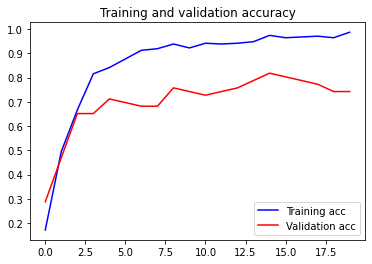

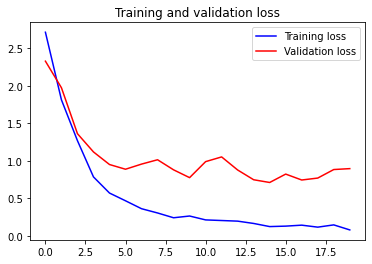

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [25]:
model.save('./CVProject_MobileNet.h5')

In [23]:
! ls

CVProject.ipynb  Dataset  Landmark_Detection_MER.pdf
